In [1]:
import numpy as np

In [2]:
#UNTUK NILAI IMPOR
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8

        #weights
        self.W1 = np.random.randn(self.inputLayerSize,\
                                 self.hiddenLayerSize)  
        self.W2 = np.random.randn(self.hiddenLayerSize,\
                                 self.outputLayerSize)  
    
    def printw(self):
        return self.W1
        
    def weight(self, W1, W2):
        #Make an internal variable for the weight:
        self.W1 = W1
        self.W2 = W2
        
    def forward(self, X):
        #forward propagation through our network
        self.z2 = np.dot(X,self.W1)  
        self.a2 = self.sigmoid(self.z2)  # activation function
        self.z3 = np.dot(self.a2, self.W2) 
        yHat = self.sigmoid(self.z3)  # final activation function
        return yHat

    def sigmoid(self, z):
        # activation function
        return 1 / (1 + np.exp(-z))
    
    def sigmoidPrime(self,z): 
        #derivative of sigmoid     
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,y):
        self.yHat=self.forward(X)
        
        delta3=np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    def getParams(self):
        params=np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self,params):
        W1_start=0
        W1_end=self.hiddenLayerSize*self.inputLayerSize
        self.W1=np.reshape(params[W1_start:W1_end],\
                          (self.inputLayerSize,self.hiddenLayerSize))
        W2_end=W1_end+self.hiddenLayerSize*self.outputLayerSize
        self.W2=np.reshape(params[W1_end:W2_end],\
                          (self.hiddenLayerSize,self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
NN = Neural_Network()

In [4]:
NN.W1

array([[-1.09337791, -0.73082752, -2.07543943,  0.30151651,  2.24079031,
        -1.23781777, -0.36487541, -0.45262874],
       [ 1.79315364,  1.50062331, -2.35408772,  0.31765449, -0.64819185,
         0.38947478, -0.20264572,  0.03324932],
       [-0.48598313,  1.10540298, -0.80522164,  0.27650927, -0.66313685,
         1.30072613, -0.6059816 ,  1.10848189],
       [ 0.32152281,  0.60558875, -0.22808782, -0.68199255, -0.53740959,
         0.49219035,  0.64246975,  0.56070858],
       [-0.53359103, -0.49556671, -1.31984163,  1.46248328,  0.83162346,
         0.27180832, -3.19438642, -1.05221887]])

In [5]:
NN.W2

array([[ 0.51251597],
       [-0.14352383],
       [-1.43488492],
       [ 1.75383647],
       [ 1.15636599],
       [-1.24581008],
       [-0.52807478],
       [ 0.39934283]])

In [6]:
#NILAI IMPOR
X=np.array(([	0.147887324	,	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	]	,
[	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	]	,
[	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	]	,
[	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	]	,
[	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	]	,
[	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	]	,
[	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	]	,
[	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	]	,
[	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	]	,
[	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	]	,
[	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	]	,
[	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	,	0	]	,
[	0.676056338	,	0.253521127	,	0.450704225	,	0	,	0.485915493	]	,
[	0.253521127	,	0.450704225	,	0	,	0.485915493	,	0.781690141	]	,
[	0.450704225	,	0	,	0.485915493	,	0.781690141	,	0.802816901	]	,
[	0	,	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	]	,
[	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	]	,
[	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	]	,
[	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	]	,
[	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	]	,
[	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	,	1	]	,
[	0.415492958	,	0.647887324	,	0.612676056	,	1	,	0.478873239	]	,
[	0.647887324	,	0.612676056	,	1	,	0.478873239	,	0.302816901	]	,
[	0.612676056	,	1	,	0.478873239	,	0.302816901	,	0.38028169	]	,
[	1	,	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	]	,
[	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	]	,
[	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	]	,
[	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	]	,
[	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	]	,
[	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	]	,
[	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	]	,
[	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	]	,
[	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	]	,
[	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	]	,
[	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	]	,
[	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	]	,
[	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	]	,
[	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	]	,
[	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	]	,
[	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	]	,
[	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	]	,
[	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	]	,
[	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	]	,
[	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	]	,
[	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	]	,
[	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	]	,
[	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	]	,
[	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	]	,
[	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	]	,
[	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	]	,
[	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	]	,
[	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	]	,
[	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	]	,
[	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	]	,
[	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	]	,
[	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	]	,
[	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	]	,

)           
,dtype=float)
y=np.array(([	0.697183099	]	,
[	0.971830986	]	,
[	0.591549296	]	,
[	0.281690141	]	,
[	0.26056338	]	,
[	0.464788732	]	,
[	0.992957746	]	,
[	0.676056338	]	,
[	0.253521127	]	,
[	0.450704225	]	,
[	0	]	,
[	0.485915493	]	,
[	0.781690141	]	,
[	0.802816901	]	,
[	0.302816901	]	,
[	0.471830986	]	,
[	0.415492958	]	,
[	0.647887324	]	,
[	0.612676056	]	,
[	1	]	,
[	0.478873239	]	,
[	0.302816901	]	,
[	0.38028169	]	,
[	0.591549296	]	,
[	0.802816901	]	,
[	0.471830986	]	,
[	0.267605634	]	,
[	0.408450704	]	,
[	0.323943662	]	,
[	0.457746479	]	,
[	0.816901408	]	,
[	0.753521127	]	,
[	0.436619718	]	,
[	0.457746479	]	,
[	0.387323944	]	,
[	0.464788732	]	,
[	0.732394366	]	,
[	0.514084507	]	,
[	0.281690141	]	,
[	0.190140845	]	,
[	0.514084507	]	,
[	0.507042254	]	,
[	0.753521127	]	,
[	0.542253521	]	,
[	0.26056338	]	,
[	0.394366197	]	,
[	0.626760563	]	,
[	0.795774648	]	,
[	0.704225352	]	,
[	0.535211268	]	,
[	0.401408451	]	,
[	0.126760563	]	,
[	0.330985915	]	,
[	0.415492958	]	,
[	0.556338028	]	,
[	0.591549296	]	,
[	0.514084507	]	,

)
,dtype=float)

dataprediksi = np.array(([	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	]	,
[	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	]	,
[	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	]	,
[	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	]	,


), dtype=float)


In [7]:
import matplotlib.pyplot as plot

In [8]:
from scipy import optimize

In [9]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [10]:
NN=Neural_Network()

In [11]:
T = trainer(NN)

In [12]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

         Current function value: 0.515855
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


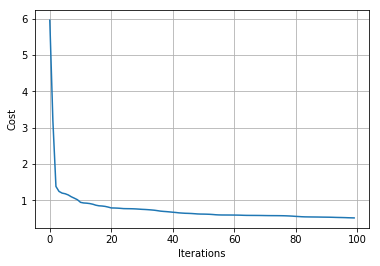

In [13]:
#Plot cost during training:
plot.plot(T.J)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.show()

In [14]:
#Training Data:
trainX = np.array(([	0.147887324	,	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	]	,
[	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	]	,
[	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	]	,
[	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	]	,
[	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	]	,
[	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	]	,
[	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	]	,
[	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	]	,
[	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	]	,
[	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	]	,
[	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	]	,
[	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	,	0	]	,
[	0.676056338	,	0.253521127	,	0.450704225	,	0	,	0.485915493	]	,
[	0.253521127	,	0.450704225	,	0	,	0.485915493	,	0.781690141	]	,
[	0.450704225	,	0	,	0.485915493	,	0.781690141	,	0.802816901	]	,
[	0	,	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	]	,
[	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	]	,
[	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	]	,
[	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	]	,
[	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	]	,
[	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	,	1	]	,
[	0.415492958	,	0.647887324	,	0.612676056	,	1	,	0.478873239	]	,
[	0.647887324	,	0.612676056	,	1	,	0.478873239	,	0.302816901	]	,
[	0.612676056	,	1	,	0.478873239	,	0.302816901	,	0.38028169	]	,
[	1	,	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	]	,
[	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	]	,
[	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	]	,
[	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	]	,
[	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	]	,
[	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	]	,
[	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	]	,
[	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	]	,
[	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	]	,
[	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	]	,
[	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	]	,
[	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	]	,
[	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	]	,
[	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	]	,
[	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	]	,
[	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	]	,
[	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	]	,
[	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	]	,
[	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	]	,
[	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	]	,
[	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	]	,

)
, dtype=float)
trainY = np.array(([	0.697183099	]	,
[	0.971830986	]	,
[	0.591549296	]	,
[	0.281690141	]	,
[	0.26056338	]	,
[	0.464788732	]	,
[	0.992957746	]	,
[	0.676056338	]	,
[	0.253521127	]	,
[	0.450704225	]	,
[	0	]	,
[	0.485915493	]	,
[	0.781690141	]	,
[	0.802816901	]	,
[	0.302816901	]	,
[	0.471830986	]	,
[	0.415492958	]	,
[	0.647887324	]	,
[	0.612676056	]	,
[	1	]	,
[	0.478873239	]	,
[	0.302816901	]	,
[	0.38028169	]	,
[	0.591549296	]	,
[	0.802816901	]	,
[	0.471830986	]	,
[	0.267605634	]	,
[	0.408450704	]	,
[	0.323943662	]	,
[	0.457746479	]	,
[	0.816901408	]	,
[	0.753521127	]	,
[	0.436619718	]	,
[	0.457746479	]	,
[	0.387323944	]	,
[	0.464788732	]	,
[	0.732394366	]	,
[	0.514084507	]	,
[	0.281690141	]	,
[	0.190140845	]	,
[	0.514084507	]	,
[	0.507042254	]	,
[	0.753521127	]	,
[	0.542253521	]	,
[	0.26056338	]	,

)
, dtype=float)

#Testing Data:
testX = np.array(([	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	]	,
[	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	]	,
[	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	]	,
[	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	]	,
[	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	]	,
[	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	]	,
[	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	]	,
[	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	]	,
[	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	]	,
[	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	]	,
[	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	]	,
[	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	]	,

)
, dtype=float)
testY = np.array(([	0.394366197	]	,
[	0.626760563	]	,
[	0.795774648	]	,
[	0.704225352	]	,
[	0.535211268	]	,
[	0.401408451	]	,
[	0.126760563	]	,
[	0.330985915	]	,
[	0.415492958	]	,
[	0.556338028	]	,
[	0.591549296	]	,
[	0.514084507	]	,

)
, dtype=float)


dataprediksi = np.array(([	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	]	,
[	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	]	,
[	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	]	,
[	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	]	,


), dtype=float)

In [15]:
testX

array([[0.51408451, 0.50704225, 0.75352113, 0.54225352, 0.26056338],
       [0.50704225, 0.75352113, 0.54225352, 0.26056338, 0.3943662 ],
       [0.75352113, 0.54225352, 0.26056338, 0.3943662 , 0.62676056],
       [0.54225352, 0.26056338, 0.3943662 , 0.62676056, 0.79577465],
       [0.26056338, 0.3943662 , 0.62676056, 0.79577465, 0.70422535],
       [0.3943662 , 0.62676056, 0.79577465, 0.70422535, 0.53521127],
       [0.62676056, 0.79577465, 0.70422535, 0.53521127, 0.40140845],
       [0.79577465, 0.70422535, 0.53521127, 0.40140845, 0.12676056],
       [0.70422535, 0.53521127, 0.40140845, 0.12676056, 0.33098592],
       [0.53521127, 0.40140845, 0.12676056, 0.33098592, 0.41549296],
       [0.40140845, 0.12676056, 0.33098592, 0.41549296, 0.55633803],
       [0.12676056, 0.33098592, 0.41549296, 0.55633803, 0.5915493 ]])

In [16]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [17]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

         Current function value: 0.322357
         Iterations: 100
         Function evaluations: 106
         Gradient evaluations: 106


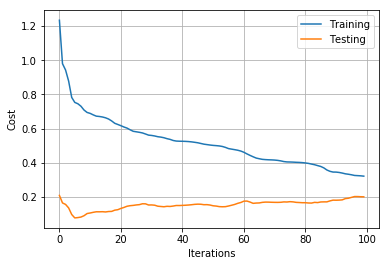

In [18]:
#Plot cost during training:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [19]:
T.J

[array([1.23386566]),
 array([0.9799313]),
 array([0.94283389]),
 array([0.87794045]),
 array([0.78255716]),
 array([0.75351742]),
 array([0.74563232]),
 array([0.73130018]),
 array([0.70898237]),
 array([0.69483211]),
 array([0.68933564]),
 array([0.68061357]),
 array([0.67312487]),
 array([0.67126243]),
 array([0.66824514]),
 array([0.66352028]),
 array([0.65630679]),
 array([0.64509029]),
 array([0.63134601]),
 array([0.62446506]),
 array([0.6173584]),
 array([0.60962037]),
 array([0.60322996]),
 array([0.59342994]),
 array([0.58464288]),
 array([0.58172022]),
 array([0.5787211]),
 array([0.57504557]),
 array([0.56882476]),
 array([0.56220145]),
 array([0.56032931]),
 array([0.55721607]),
 array([0.55296457]),
 array([0.55063393]),
 array([0.54695723]),
 array([0.54152046]),
 array([0.53733274]),
 array([0.53087824]),
 array([0.52755253]),
 array([0.52667907]),
 array([0.52632694]),
 array([0.52568142]),
 array([0.52454869]),
 array([0.5227257]),
 array([0.5202461]),
 array([0.51754

In [20]:
T.testJ

[array([0.20973725]),
 array([0.165844]),
 array([0.15711399]),
 array([0.13660648]),
 array([0.09815677]),
 array([0.07822089]),
 array([0.0801515]),
 array([0.0832022]),
 array([0.09104592]),
 array([0.1037549]),
 array([0.10700674]),
 array([0.11098034]),
 array([0.11409203]),
 array([0.11391864]),
 array([0.1145487]),
 array([0.11308559]),
 array([0.11564214]),
 array([0.11639376]),
 array([0.12354236]),
 array([0.1262804]),
 array([0.13376867]),
 array([0.13945012]),
 array([0.14648523]),
 array([0.14967455]),
 array([0.15142691]),
 array([0.15409676]),
 array([0.15577901]),
 array([0.16094534]),
 array([0.16054771]),
 array([0.15375487]),
 array([0.15407214]),
 array([0.15247623]),
 array([0.14672274]),
 array([0.14504648]),
 array([0.14347183]),
 array([0.14611433]),
 array([0.14523849]),
 array([0.14755271]),
 array([0.15076117]),
 array([0.15061634]),
 array([0.15143612]),
 array([0.15237798]),
 array([0.15363447]),
 array([0.15540893]),
 array([0.15754685]),
 array([0.1586684

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.36431423266894974

In [22]:
yHat = NN.forward(X)

In [23]:
yHat

array([[0.6930459 ],
       [0.89550017],
       [0.59953728],
       [0.23681739],
       [0.24542044],
       [0.48258346],
       [0.80121655],
       [0.57158236],
       [0.23234517],
       [0.30531546],
       [0.247078  ],
       [0.5056388 ],
       [0.70884838],
       [0.86727772],
       [0.28206919],
       [0.44502768],
       [0.2565781 ],
       [0.58112857],
       [0.73623877],
       [0.6721945 ],
       [0.51504892],
       [0.22467804],
       [0.3663282 ],
       [0.42348126],
       [0.85339625],
       [0.61210219],
       [0.28136026],
       [0.41509716],
       [0.39156519],
       [0.58880611],
       [0.68960889],
       [0.74129633],
       [0.46817706],
       [0.35816986],
       [0.32662957],
       [0.52652822],
       [0.70936661],
       [0.62498622],
       [0.33154965],
       [0.39879771],
       [0.46797367],
       [0.66919471],
       [0.63951878],
       [0.61069404],
       [0.61086836],
       [0.29611154],
       [0.33907768],
       [0.701

In [24]:
y

array([[0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.795

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.018383121500174435

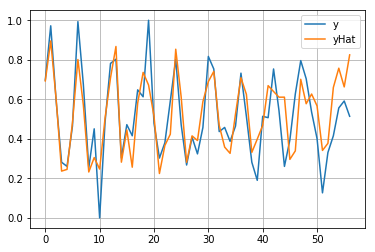

In [26]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [27]:
#Regularization Parameter:
Lambda = 0.0001

In [28]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [29]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [30]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [31]:
NN = Neural_Network(Lambda=0.0001)

In [32]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [33]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

5.988044243288231e-10

In [34]:
T = trainer(NN)

In [35]:
T.train(X,y,testX,testY)

         Current function value: 0.014982
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102


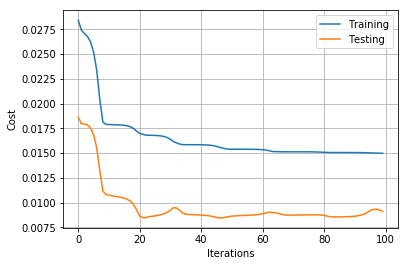

In [36]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [37]:
T.J

[array([0.02840771]),
 array([0.02742665]),
 array([0.0270595]),
 array([0.02676204]),
 array([0.02620993]),
 array([0.02518101]),
 array([0.02333276]),
 array([0.02038354]),
 array([0.01812791]),
 array([0.01789847]),
 array([0.0178771]),
 array([0.01786791]),
 array([0.01785686]),
 array([0.01784708]),
 array([0.0178303]),
 array([0.0178002]),
 array([0.01774539]),
 array([0.01764625]),
 array([0.01747302]),
 array([0.01720141]),
 array([0.01697195]),
 array([0.01689233]),
 array([0.01681274]),
 array([0.01679536]),
 array([0.01678973]),
 array([0.01677965]),
 array([0.01676112]),
 array([0.01672689]),
 array([0.01666449]),
 array([0.01655464]),
 array([0.01637582]),
 array([0.01614707]),
 array([0.01602168]),
 array([0.01590217]),
 array([0.01585284]),
 array([0.01584547]),
 array([0.01584482]),
 array([0.01584408]),
 array([0.01584281]),
 array([0.0158405]),
 array([0.01583624]),
 array([0.01582833]),
 array([0.01581379]),
 array([0.01578757]),
 array([0.01574208]),
 array([0.01566

In [38]:
T.testJ

[array([0.01863214]),
 array([0.01797073]),
 array([0.01792849]),
 array([0.01783589]),
 array([0.01752262]),
 array([0.01684002]),
 array([0.01551002]),
 array([0.01321364]),
 array([0.01116222]),
 array([0.01082562]),
 array([0.01074288]),
 array([0.01069047]),
 array([0.0106228]),
 array([0.01057707]),
 array([0.01052311]),
 array([0.01044749]),
 array([0.01032827]),
 array([0.01012933]),
 array([0.0097917]),
 array([0.00923171]),
 array([0.00863047]),
 array([0.00848675]),
 array([0.00848333]),
 array([0.00857807]),
 array([0.00862017]),
 array([0.00866521]),
 array([0.00871852]),
 array([0.00878844]),
 array([0.00888713]),
 array([0.00903258]),
 array([0.00924611]),
 array([0.00949622]),
 array([0.00945105]),
 array([0.00920002]),
 array([0.0089419]),
 array([0.00881996]),
 array([0.00879841]),
 array([0.00878315]),
 array([0.00876989]),
 array([0.0087564]),
 array([0.00874012]),
 array([0.00871819]),
 array([0.00868683]),
 array([0.00864122]),
 array([0.00857713]),
 array([0.0084

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.006963242931083096

In [40]:
yHat=NN.forward(X)

In [41]:
yHat

array([[0.62107667],
       [0.50108073],
       [0.48873192],
       [0.32502338],
       [0.28408356],
       [0.42042835],
       [0.64394652],
       [0.74392071],
       [0.46033688],
       [0.29992911],
       [0.43918117],
       [0.47647384],
       [0.71078419],
       [0.76418121],
       [0.57206593],
       [0.33656139],
       [0.41651158],
       [0.52661575],
       [0.60624231],
       [0.52948594],
       [0.54806454],
       [0.32790149],
       [0.31038457],
       [0.47685918],
       [0.64348411],
       [0.6243832 ],
       [0.41257386],
       [0.36416748],
       [0.52510463],
       [0.5873055 ],
       [0.62326878],
       [0.67623895],
       [0.51531549],
       [0.34793898],
       [0.39062341],
       [0.48043938],
       [0.55855971],
       [0.62310368],
       [0.47434142],
       [0.39190856],
       [0.467638  ],
       [0.68670384],
       [0.65503021],
       [0.60951517],
       [0.45023137],
       [0.36645151],
       [0.50554719],
       [0.654

In [42]:
y

array([[0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.795

In [43]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.027516968964360445

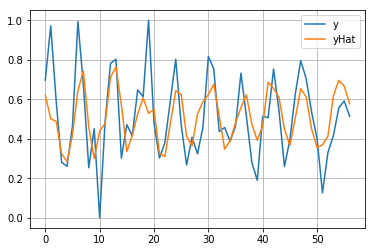

In [44]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [45]:
prediksi=NN.forward(dataprediksi)

In [46]:
prediksi

array([[0.48228988],
       [0.44272234],
       [0.49536951],
       [0.55684773]])

In [47]:
from sklearn.metrics import mean_squared_error 

In [48]:
Y_true= ([	0.387323944	]	,
[	0.373239437	]	,
[	0.366197183	]	,
[	0.443661972	]	,
)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.010835727459092157

In [49]:
dataprediksi

array([[0.33098592, 0.41549296, 0.55633803, 0.5915493 , 0.51408451],
       [0.41549296, 0.55633803, 0.5915493 , 0.51408451, 0.38732394],
       [0.55633803, 0.5915493 , 0.51408451, 0.38732394, 0.37323944],
       [0.5915493 , 0.51408451, 0.38732394, 0.37323944, 0.36619718]])

In [50]:
a=np.array([	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	,	0.443661972	])

In [51]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.60211715])

In [52]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.62080909])

In [53]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.54898215])

In [54]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.46134529])

In [55]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.43213196])

In [56]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.46904285])